#### Problem: Consider the sequence of handwritten digits. Given a set of training examples to learn, can we produce a system which can predict a ‘new’ digit correctly ? While predicting a 'new' digit correctly, can we make the training process, which is  iterative in nature, more efficient and the analysis of the data to result in intuitive inferences?

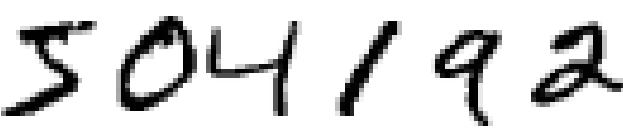

In [1]:
from IPython.display import Image
Image(filename='/home/mrafi123/Downloads/handwrittendigits.png') 

#### Such dataasets are high dimensional in nature because each image consists of 784 pixel values and pose problems during training a learning model because of the size and is hard to visualize and comprehend because of the many features represented in pixels.  Let us try and find a solution to this problem by trying to compress the data without losing accuracy and ways to analyze and visualize the data in 2D instead of the original 784D

#### Dataset : The dataset given is the MNIST handwritten images for training.
    
#### Each handwritten image is 28 * 28 image with 784 pixel values
    
#### Training dataset: The ``training_data`` is returned as a tuple with two entries.    The first entry contains the actual training images.  This is a numpy ndarray (multi-dimensional python array) with 50000 entries.  Each entry is, in turn, a numpy ndarray with 784 values, representing the 28 * 28 = 784 pixels in a single MNIST image.

#### Training data labels: The second entry in the ``training_data`` tuple is a numpy ndarray containing 50000 entries.  Those entries are just the digit values (0...9) for the corresponding images contained in the first entry of the tuple.

#### The ``validation_data`` and ``test_data`` are similar, except  each contains only 10000 images.

In [2]:
##mnist_loader : Return the MNIST data as a tuple containing 
##the training data,the validation data, and the test data.

import mnist_loader
training_inputs,training_results, validation_inputs,validation_results, test_inputs,test_results = mnist_loader.load_data_dr()


##### Let us investigate the shape of the training and test data sets after being loaded into memory.

In [3]:
## Import the python libraries to be used for this experiment
import datetime
import gc
import numpy as np
from sklearn.decomposition import RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier

In [4]:
training_inputs = np.array(training_inputs)
training_results = np.array(training_results)   
test_inputs = np.array (test_inputs)
test_results = np.array(test_results)
print (training_inputs.shape)
print (training_results.shape)
print (test_inputs.shape)
print (test_results.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)


#### Now let us understand the size of the training and test dataset (in Bytes)

In [5]:
print ('Size of Training Data in MB',training_inputs.nbytes/1000000)
print ('Size of Training Labels in MB',training_results.nbytes/1000000)
print ('Size of Test Data in MB',test_inputs.nbytes/1000000)
print ('Size of Test Labels in MB',test_results.nbytes/1000000)

Size of Training Data in MB 156.8
Size of Training Labels in MB 0.4
Size of Test Data in MB 31.36
Size of Test Labels in MB 0.08


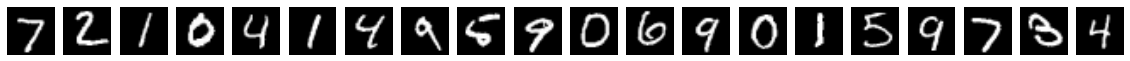

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 20  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_inputs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Train the model using KNN classifier and test it without applying any dimensionality reduction

In [7]:
    num=len(test_inputs)
    a = datetime.datetime.now()   
    clf = KNeighborsClassifier()

    #training knn
    clf = clf.fit(training_inputs, training_results)
    b = datetime.datetime.now()
    c=b-a
    print("Time required for Training in Seconds ",c.seconds)

    #predicting
    a = datetime.datetime.now()      
    y_pred = clf.predict(test_inputs[:num])
    b = datetime.datetime.now()
    c=b-a
    print("Time required for Predicting in Seconds ",c.seconds)

    #checking the predicted labels against the original labels and printing output
    r=0
    w=0
    for i in range(num):
        if np.array_equal(y_pred[i],test_results[i]):
            r+=1
        else:
            w+=1
    print ("tested ", num, " digits")
    print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
    print ("got correctly ", float(r)*100/(r+w), "%")

Time required for Training in Seconds  12
Time required for Predicting in Seconds  1002
tested  10000  digits
correct:  9664 wrong:  336 error rate:  3.36 %
got correctly  96.64 %


#### Train the model and test it by applying a dimensionality reduction method- for the sake of simplicity, let us use Principal Component Analysis. 
#### We are trying to observe if we get significant compression after PCA without losing the accuracy of the prediction

In [10]:
def recognizePCA(train, trainlab, test, labels, num=None):

    if num is None:
        num=len(test)
    train4pca = np.array(train)
    test4pca = np.array(test)   

    n_components = 25

    #Apply pca
    a = datetime.datetime.now()
    print ("Size of training data set before reduction in Mega Bytes ",train4pca.nbytes/1000000)
    print ("Size of test data set before reduction in Mega Bytes ",test4pca.nbytes/1000000)

    pca = RandomizedPCA(n_components=n_components).fit(train4pca)
    xtrain = pca.transform(train4pca)
    xtest = pca.transform(test4pca)
    print ("Size of training data set after reduction to 25 Components in Mega Bytes ",xtrain.nbytes/1000000)
    print ("Size of test data set after reduction to 25 Components in Mega Bytes ",xtest.nbytes/1000000)
    
    print ("Compression acheived for training %",(1-(xtrain.nbytes/train4pca.nbytes))*100)
    print ("Compression acheived for test %",(1-(xtest.nbytes/test4pca.nbytes))*100)

    b = datetime.datetime.now()
    c=b-a
    print("Time required for PCA in seconds",c.seconds)
    
    a = datetime.datetime.now()   
    clf = KNeighborsClassifier()

    #fitting knn    
    clf = clf.fit(xtrain, trainlab)
    b = datetime.datetime.now()
    c=b-a
    print("Time required for Training in seconds",c.seconds)

    a = datetime.datetime.now()   
    #predicting
    y_pred = clf.predict(xtest[:num])
    #print ('y_pred ',np.shape(y_pred))
    b = datetime.datetime.now()
    c=b-a
    print("Time required for Predicting in seconds",c.seconds)



    #checking the predicted labels against the original labels and printing output
    r=0
    w=0
    for i in range(num):
        if np.array_equal(y_pred[i],labels[i]):
            r+=1
        else:
            w+=1
    print ("tested ", num, " digits")
    print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
    print ("got correctly ", float(r)*100/(r+w), "%")

In [11]:
recognizePCA(training_inputs, training_results, test_inputs, test_results)

Size of training data set before reduction in Mega Bytes  156.8
Size of test data set before reduction in Mega Bytes  31.36


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Size of training data set after reduction to 25 Components in Mega Bytes  10.0
Size of test data set after reduction to 25 Components in Mega Bytes  2.0
Compression acheived for training % 93.62244897959184
Compression acheived for test % 93.62244897959184
Time required for PCA in seconds 3
Time required for Training in seconds 0
Time required for Predicting in seconds 14
tested  10000  digits
correct:  9725 wrong:  275 error rate:  2.75 %
got correctly  97.25 %


#### Visualization of high dimensional data (784 pixels in this case) is impossible and less intuitive in data analysis and interpretation. 
#### For these kind of problems dimensionality reduction proves to be the best solution for intuitive visualization of such high dimensional data . 
#### Let us reduce the dimensions from 784 to 3 dimensions and plot them over a scatter plot to undertand how the digits are distributed

In [12]:
n_components = 3

#Apply pca
pca = RandomizedPCA(n_components=n_components).fit(training_inputs)
xtrain = pca.transform(training_inputs)
xtest = pca.transform(test_inputs)
xtest = xtest/255
    

/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
### hence select a sample of few images
xtest_sample = xtest[:2000,:]
test_results_sample = test_results[0:2000]


In [14]:
import matplotlib.pyplot as plt
%matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for i in range(len(test_results_sample)): #plot each point + it's index as text above
ax.scatter(xtest_sample[:,0],xtest_sample[:,1],xtest_sample[:,2],c=test_results_sample,s=10)

for x,y,z,i in zip(xtest_sample[:,0],xtest_sample[:,1],xtest_sample[:,2],test_results_sample):
    ax.text(x,y,z,i)

ax.set_xlabel(' PC#1')
ax.set_ylabel(' PC#2')
ax.set_zlabel(' PC#3')

plt.show()

Using matplotlib backend: Qt4Agg


# Observations 

###  Dimensionality reduction (DR) technique 

### Data Compression
#### We have acheived data compression of about 93.62%, not only losing any prediction accuracy but also better

###  Visualization is very intuitive. 
#### As we can observe from the visualization the digits 0,1 and 3 to have distinct features to differentiate them but the rest of the digits seem to lose thier representation among other digits which infers that they may be hard to classify. 
#### We can also observe that most people write 1 and 7 somewhat similar since they are grouped next to each other in the cluster.

###  Computing Clock Time
#### Even though there is an extra step for DR the total time taken for training and predicting is 657 seconds without DR and it took only about 15 seconds with DR



/home/mrafi123/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


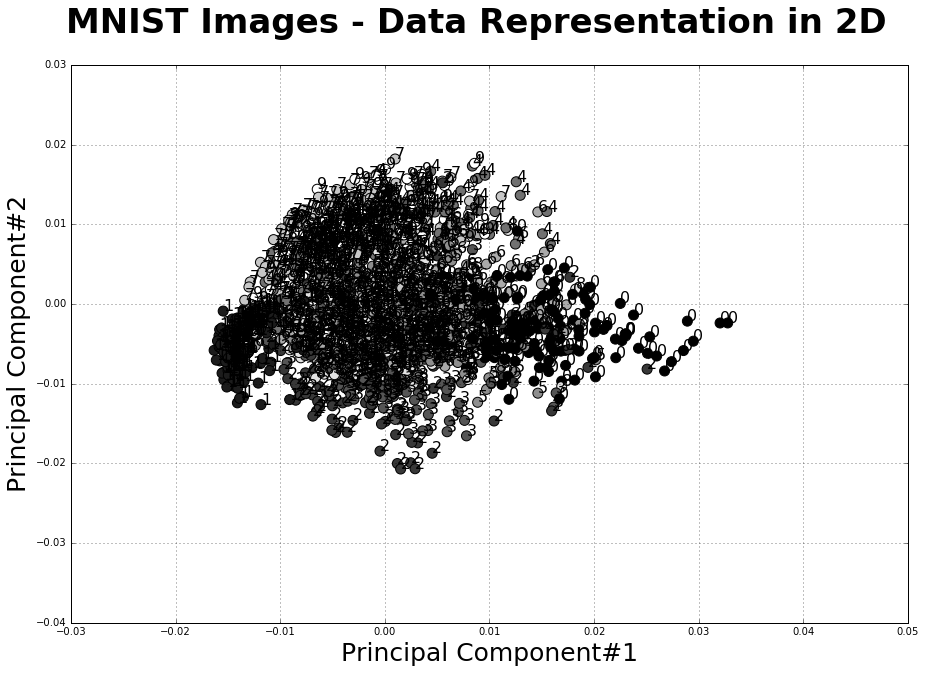

In [15]:
%matplotlib inline

fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
fig.suptitle('MNIST Images - Data Representation in 2D',fontsize=34, fontweight='bold')

plt.xlabel('Principal Component#1', fontsize=25)
plt.ylabel('Principal Component#2', fontsize=25)

plt.scatter(xtest_sample[:,0],xtest_sample[:,1],c=test_results_sample,s=100)
for label, x, y in zip(test_results_sample, xtest_sample[:,0], xtest_sample[:,1]):
    ax.annotate(label,xy=(x,y),textcoords='data', size=16)
ax.legend()
plt.grid()
plt.show()